# Importing libraries and our dataset

In [30]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../data/for_modelling/credit_score_valid.csv')
df=pd.concat([df_train, df_val])
df.head()

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  R_DEBT_SAVINGS  \
0    2783     1855        0            0.6665           0.00          0.0000   
1  314430   445442   707468            1.4167           2.25          1.5882   
2  161773   517674  2782496            3.2000          17.20          5.3750   
3   16014    97685    20818            6.1000           1.30          0.2131   
4  193225  1410542  2589215            7.3000          13.40          1.8356   

   T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  ...  \
0            103            74      0.7184             0.0370  ...   
1          35861         29157      0.8131             0.1141  ...   
2           3716          2533      0.6816             0.0230  ...   
3            637           187      0.2936             0.0398  ...   
4           5276          2325      0.4407             0.0273  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                 2.5003              0.0000            No         0   
1                 0.5882              0.3704          High         1   
2                 0.3125              0.0581            No         1   
3                 0.1639              0.7692            No         1   
4                 0.1370              0.0746            No         1   

   CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                0             0                    1               0   
1                0             1                    1               0   
2                1             1                    1               1   
3                0             0                    1               0   
4                1             0                    1               1   

   CREDIT_SCORE  DEFAULT  
0           570        0  
1           691        0  
2           520        0  
3           654        0  
4           552        0  

[5 rows x 86 columns]

In [31]:
# let's set our target and look into it
target='DEFAULT'
df[target].value_counts()

0    450
1    178
Name: DEFAULT, dtype: int64

# Missing values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 137
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCOME                   628 non-null    int64  
 1   SAVINGS                  628 non-null    int64  
 2   DEBT                     628 non-null    int64  
 3   R_SAVINGS_INCOME         628 non-null    float64
 4   R_DEBT_INCOME            628 non-null    float64
 5   R_DEBT_SAVINGS           628 non-null    float64
 6   T_CLOTHING_12            628 non-null    int64  
 7   T_CLOTHING_6             628 non-null    int64  
 8   R_CLOTHING               628 non-null    float64
 9   R_CLOTHING_INCOME        628 non-null    float64
 10  R_CLOTHING_SAVINGS       628 non-null    float64
 11  R_CLOTHING_DEBT          628 non-null    float64
 12  T_EDUCATION_12           628 non-null    int64  
 13  T_EDUCATION_6            628 non-null    int64  
 14  R_EDUCATION              6

There are no missing values in our dataset :))

# Categorical variables
In our dataset there is only one categorical variable - 'CAT_GAMBLING'.

In [33]:
df['CAT_GAMBLING'].value_counts()

No      392
High    163
Low      73
Name: CAT_GAMBLING, dtype: int64

We will use ordinal encoding for this variable

In [34]:
df['CAT_GAMBLING'] = df['CAT_GAMBLING'].map({'No': 0, 'Low': 1,'High': 2})
df

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0      2783     1855        0            0.6665         0.0000   
1    314430   445442   707468            1.4167         2.2500   
2    161773   517674  2782496            3.2000        17.2000   
3     16014    97685    20818            6.1000         1.3000   
4    193225  1410542  2589215            7.3000        13.4000   
..      ...      ...      ...               ...            ...   
133  386976  1250231   654883            3.2308         1.6923   
134   16772     8386        0            0.5000         0.0000   
135  137509   206264   206264            1.5000         1.5000   
136  259146  1922000  1662854            7.4167         6.4167   
137   56657   442952    51506            7.8181         0.9091   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            0.0000            103            74      0.7184   
1            1.5882          35861         29157      0.8131   
2            5.3750           3716          2533      0.6816   
3            0.2131            637           187      0.2936   
4            1.8356           5276          2325      0.4407   
..              ...            ...           ...         ...   
133          0.5238          36665         30569      0.8337   
134          0.0000            238           186      0.7815   
135          1.0000          15661         10865      0.6938   
136          0.8652          12180          8527      0.7001   
137          0.1163           1085           289      0.2664   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  \
0               0.0370  ...                 2.5003              0.0000   
1               0.1141  ...                 0.5882              0.3704   
2               0.0230  ...                 0.3125              0.0581   
3               0.0398  ...                 0.1639              0.7692   
4               0.0273  ...                 0.1370              0.0746   
..                 ...  ...                    ...                 ...   
133             0.0947  ...                 0.2381              0.4545   
134             0.0142  ...                 2.5000              0.9786   
135             0.1139  ...                 0.6667              0.6667   
136             0.0470  ...                 0.1124              0.1299   
137             0.0192  ...                 0.1163              1.0000   

     CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  \
0               0         0                0             0   
1               2         1                0             1   
2               0         1                1             1   
3               0         1                0             0   
4               0         1                1             0   
..            ...       ...              ...           ...   
133             0         1                0             0   
134             0         0                0             0   
135             0         1                0             0   
136             2         1                1             0   
137             0         1                0             0   

     CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  
0                      1               0           570        0  
1                      1               0           691        0  
2                      1               1           520        0  
3                      1               0           654        0  
4                      1               1           552        0  
..                   ...             ...           ...      ...  
133                    1               0           562        0  
134                    1               0           619        0  
135                    1               0           639        1  
136                    1               1           587        1  
137                    1               0           635        1  

[628 rows x 86 c

# Detecting outliers

In [ ]:
#let's prepare dataset without 'DEFAULT', binary variables and 'Cat_gambling' because it was categorical
#we will use it often in the next steps
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
rest_cols = [col for col in df.columns if col not in binary_cols]
rest_cols.remove('CAT_GAMBLING')

### boxplot

In [48]:
# for col in rest_cols:
#     sns.boxplot(x=df[col])
#     plt.show()

### PyOD

In [50]:
from pyod.models.knn import KNN
clf = KNN(contamination=0.1)
clf.fit(df[rest_cols])
outliers=pd.DataFrame(clf.labels_, columns=['outliers'])
outliers['outliers'] = clf.labels_
outliers.value_counts()

  File "C:\Users\domin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


outliers
0           565
1            63
dtype: int64

### scatter plot

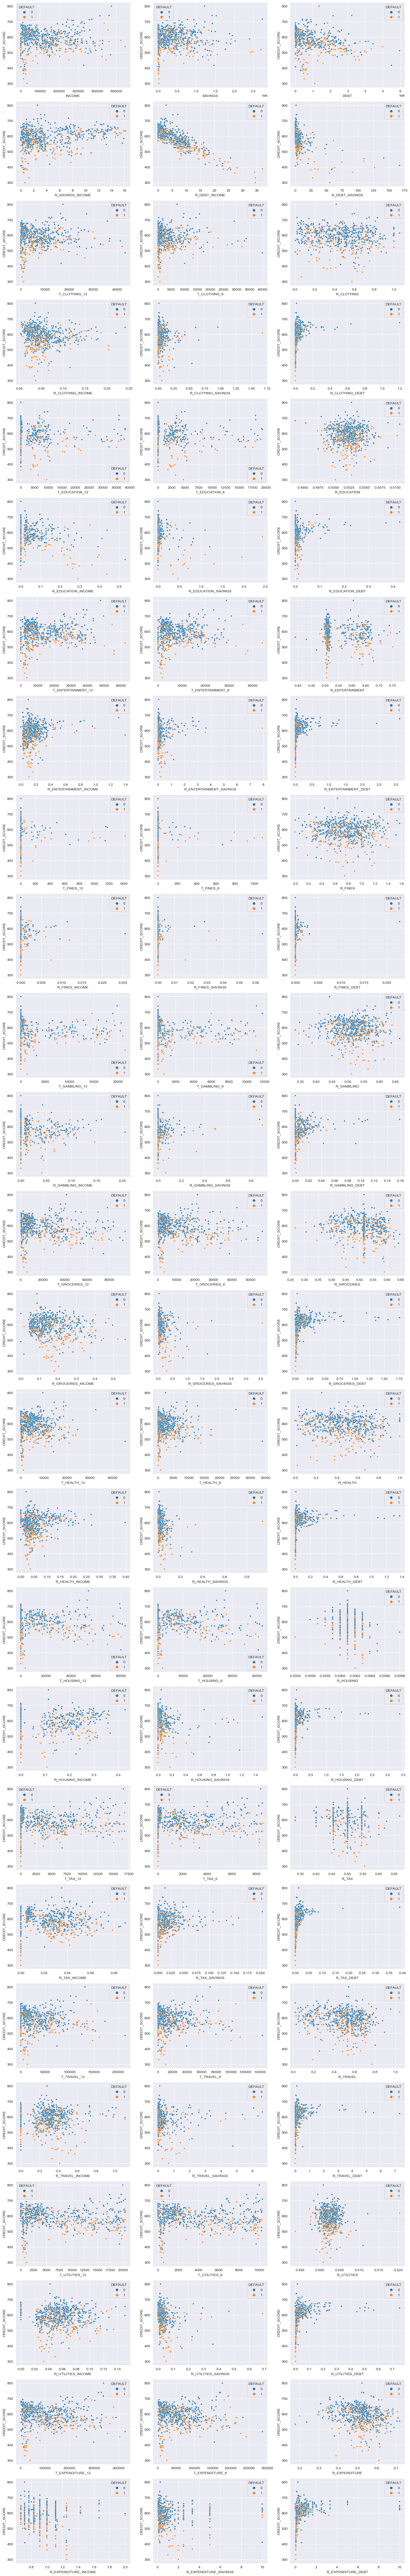

In [40]:
# we are showing scatterplots for all features except 'DEFAULT', binary variables and 'Cat_gambling' because it was categorical
df_without_binary = [col for col in df.columns if df[col].nunique() > 2]
columns_to_scatter_plot = [col for col in df_without_binary if col not in ['CREDIT_SCORE', 'CAT_GAMBLING', 'DEFAULT']]

fig, axs = plt.subplots(26, 3, figsize=(16, 100)) 
axs = axs.flatten()
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=df, x=col, y="CREDIT_SCORE", ax=axs[i], s=15, hue='DEFAULT')

plt.tight_layout() 
plt.show()

Outliers:
- 'T_CLOTHING_6' - above 37000 (there is only one observation)
- 'R_CLOTHING_SAVINGS' - above 1.50 (there is only one observation)
- 'R_CLOTHING_DEBT' - above 1.0 (there is only one observation)
- 'R_EDUCATION_SAVINGS' - above 1.7 (there is only two observation)
- 'R_EDUCATION_DEBT' - above 0.3 (there is only two observation)
- 'R_ENTERAINMENT_INCOME' - above 1.2 (there is only two observation)
- 'R_ENTERAINMENT_SAVINGS' - above 6 (there is only one observation)
- 'R_ENTERAINMENT_DEBT' - above 2.0 (there is only two observation)
- 'R_FINES_INCOME' - above 0.02 (there is only one observation)
- 'R_FINES_SAVINGS' - above 0.05 (there is only one observation)
- 'R_FINES_DEBT' - above 0.02 (there is only one observation)
- 'R_GAMBLING_INCOME' - above 0.2 (there is only one observation)
- 'R_GAMBLING_SAVINGS' - above 0.8 (there is only two observation)
- 'R_GAMBLING_DEBT' - above 0.15 (there is only one observation)
- 'R_GROCERIES_SAVINGS' - above 3.5 (there is only one observation)
- 'T_HEALTH_12' - above 40000 (there is only one observation)
- 't_health_6' - above 25000 (there is only two observation)
- 'R_HEALTH_INCOME' - above 0.3 (there is only one observation)
- 'R_HEALTH_SAVINGS' - above 0.8 (there is only one observation)
- 'R_HOUSING_DEBT' - above 3 (there is only one observation)
- 'R_TAX_DEBT' - above 0.15 (there is only two observation)

Let's remove these outliers

In [46]:
# Definiowanie granic dla outlierów
outliers_dict = {
    'T_CLOTHING_6': 37000,
    'R_CLOTHING_SAVINGS': 1.50,
    'R_CLOTHING_DEBT': 1.0,
    'R_EDUCATION_SAVINGS': 1.7,
    'R_EDUCATION_DEBT': 0.3,
    'R_ENTERTAINMENT_INCOME': 1.2,
    'R_ENTERTAINMENT_SAVINGS': 6,
    'R_ENTERTAINMENT_DEBT': 2.0,
    'R_FINES_INCOME': 0.02,
    'R_FINES_SAVINGS': 0.05,
    'R_FINES_DEBT': 0.02,
    'R_GAMBLING_INCOME': 0.2,
    'R_GAMBLING_SAVINGS': 0.8,
    'R_GAMBLING_DEBT': 0.15,
    'R_GROCERIES_SAVINGS': 3.5,
    'T_HEALTH_12': 40000,
    'T_HEALTH_6': 25000,
    'R_HEALTH_INCOME': 0.3,
    'R_HEALTH_SAVINGS': 0.8,
    'R_HOUSING_DEBT': 3,
    'R_TAX_DEBT': 0.15
}

for col, threshold in outliers_dict.items():
    df_without_outliers = df[df[col] <= threshold]

df_without_outliers.reset_index(drop=True, inplace=True)
df_without_outliers

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0      2783     1855        0            0.6665         0.0000   
1    314430   445442   707468            1.4167         2.2500   
2    161773   517674  2782496            3.2000        17.2000   
3     16014    97685    20818            6.1000         1.3000   
4    193225  1410542  2589215            7.3000        13.4000   
..      ...      ...      ...               ...            ...   
621  386976  1250231   654883            3.2308         1.6923   
622   16772     8386        0            0.5000         0.0000   
623  137509   206264   206264            1.5000         1.5000   
624  259146  1922000  1662854            7.4167         6.4167   
625   56657   442952    51506            7.8181         0.9091   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            0.0000            103            74      0.7184   
1            1.5882          35861         29157      0.8131   
2            5.3750           3716          2533      0.6816   
3            0.2131            637           187      0.2936   
4            1.8356           5276          2325      0.4407   
..              ...            ...           ...         ...   
621          0.5238          36665         30569      0.8337   
622          0.0000            238           186      0.7815   
623          1.0000          15661         10865      0.6938   
624          0.8652          12180          8527      0.7001   
625          0.1163           1085           289      0.2664   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  \
0               0.0370  ...                 2.5003              0.0000   
1               0.1141  ...                 0.5882              0.3704   
2               0.0230  ...                 0.3125              0.0581   
3               0.0398  ...                 0.1639              0.7692   
4               0.0273  ...                 0.1370              0.0746   
..                 ...  ...                    ...                 ...   
621             0.0947  ...                 0.2381              0.4545   
622             0.0142  ...                 2.5000              0.9786   
623             0.1139  ...                 0.6667              0.6667   
624             0.0470  ...                 0.1124              0.1299   
625             0.0192  ...                 0.1163              1.0000   

     CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  \
0               0         0                0             0   
1               2         1                0             1   
2               0         1                1             1   
3               0         1                0             0   
4               0         1                1             0   
..            ...       ...              ...           ...   
621             0         1                0             0   
622             0         0                0             0   
623             0         1                0             0   
624             2         1                1             0   
625             0         1                0             0   

     CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  
0                      1               0           570        0  
1                      1               0           691        0  
2                      1               1           520        0  
3                      1               0           654        0  
4                      1               1           552        0  
..                   ...             ...           ...      ...  
621                    1               0           562        0  
622                    1               0           619        0  
623                    1               0           639        1  
624                    1               1           587        1  
625                    1               0           635        1  

[626 rows x 86 c

# Variables transformation

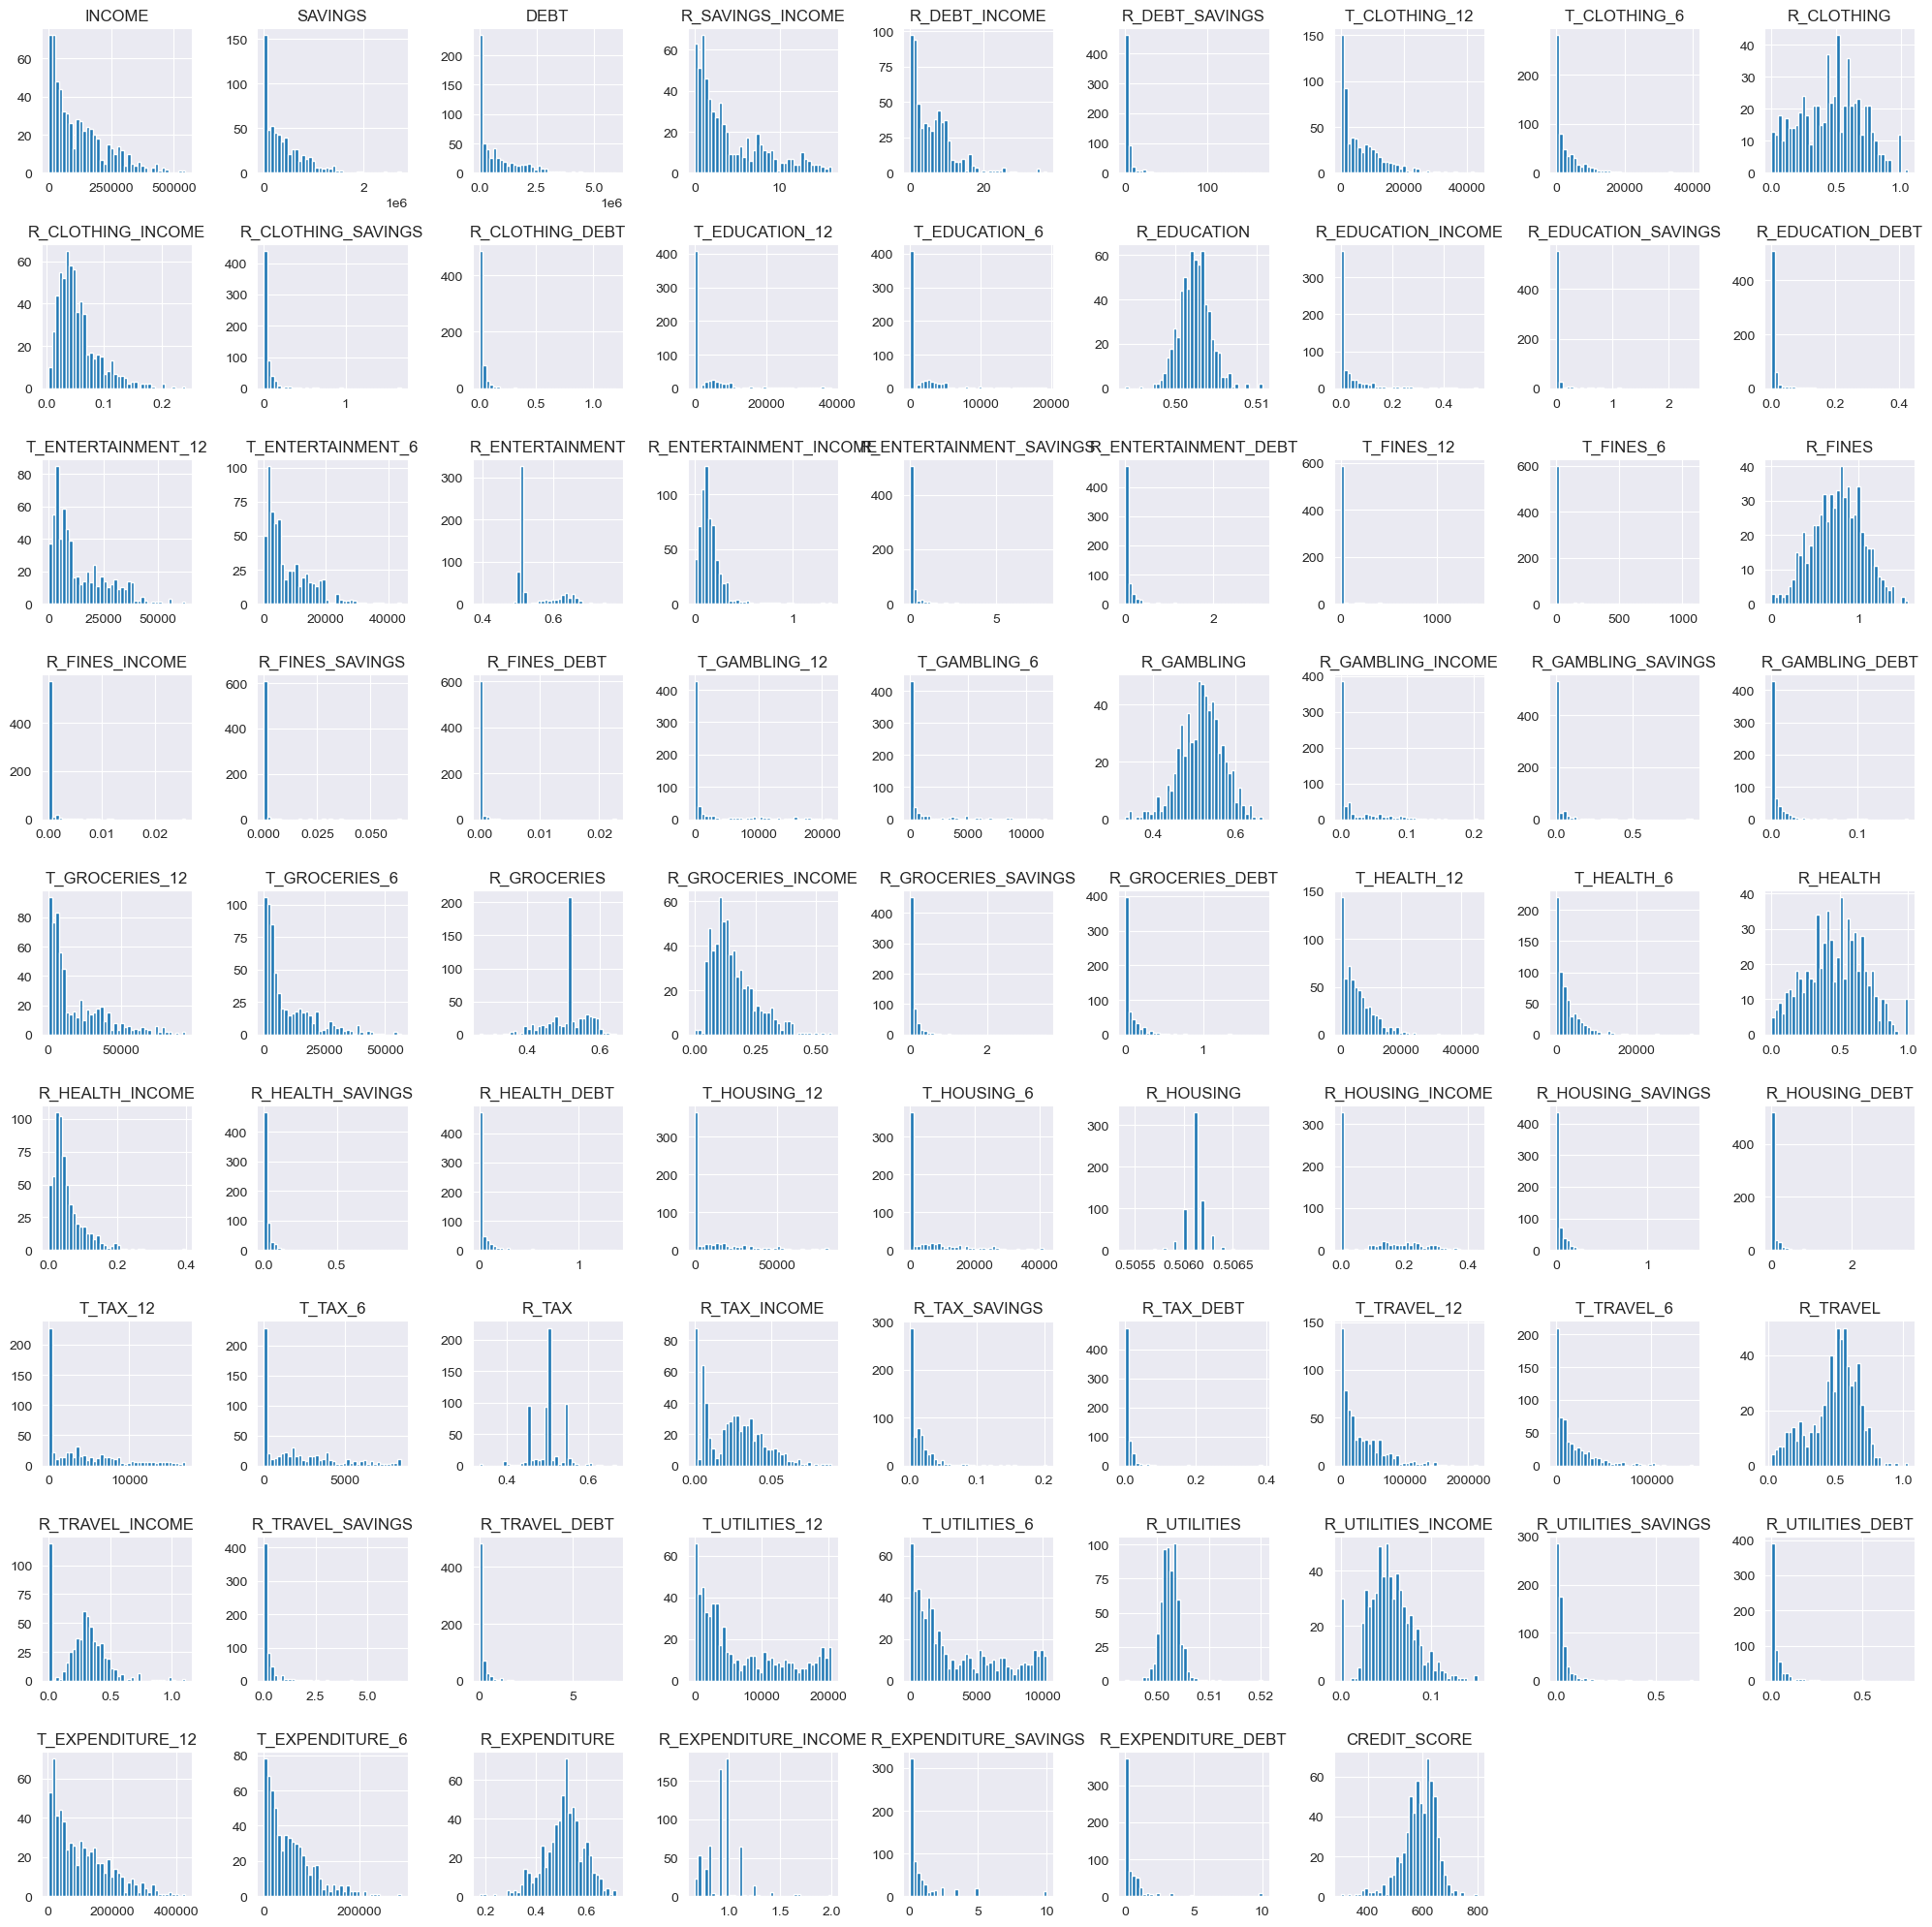

In [51]:
# histograms for our dataset
df[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()